In [1]:
# importando os dados
import pandas as pd

path = r'/home/lapisco/Desktop/ica/ICA/Dados/datasets/regressao/sawtooth/data.csv'
data = pd.read_csv(path)

data = pd.DataFrame(data)
data

,0,0.016938
0,0.015747,0.097266
1,0.031495,0.200640
2,0.047242,0.280490
3,0.062989,0.374350
4,0.078737,0.429360
...,...,...
394,6.220200,-0.272460
395,6.235900,-0.146920
396,6.251700,-0.066223
397,6.267400,-0.065585


<Axes: xlabel='0', ylabel='0.016938'>

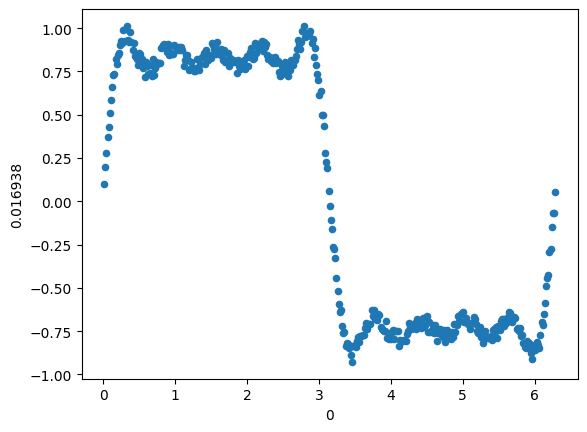

In [2]:
data.plot(kind='scatter', x = '0', y = '0.016938')

In [3]:
# Pré-processamento
#   Normalizando os dados

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
normalizador.fit(data)

dados_normalizados = pd.DataFrame(normalizador.transform(data), columns = data.columns)

X = dados_normalizados.drop(columns='0.016938')
y = dados_normalizados['0.016938']

XB = data.drop(columns='0.016938')
yB = data['0.016938']

dados_normalizados.head()


,0,0.016938
0,0.000000,0.528059
1,0.002513,0.581323
2,0.005025,0.622466
3,0.007538,0.670828
4,0.010050,0.699172


In [4]:
from sklearn.model_selection import train_test_split

X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
corr = data.corr()
corr

,0,0.016938
0,1.000000,-0.847539
0.016938,-0.847539,1.000000


### Regressão Multipla == Regressão Simples

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lrB = LinearRegression()

lr.fit(X_train, y_train)
lrB.fit(X_trainB, y_trainB)

r = lr.score(X_test, y_test)
rB = lrB.score(X_testB, y_testB)

print('',"-"*50, '\nCom Normalização: r = ', r, '\n', '-'*50, '\nSem Normalização: rB = ', rB, '\n', '-'*50)

 -------------------------------------------------- 
Com Normalização: r =  0.7226637419743366 
 -------------------------------------------------- 
Sem Normalização: rB =  0.7226637419743367 
 --------------------------------------------------


In [7]:
import numpy as np 

X = dados_normalizados['0']
y = dados_normalizados['0.016938']

X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1)).ravel()

XB = data['0']
yB = data['0.016938']

XB = np.reshape(XB, (-1,1))
yB = np.reshape(yB, (-1,1)).ravel()
# Separando os dados para o treinamento

from sklearn.model_selection import train_test_split

X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lrB = LinearRegression()

lr.fit(X_train, y_train)
lrB.fit(X_trainB, y_trainB)

r = lr.score(X_test, y_test)
rB = lrB.score(X_testB, y_testB)

print('',"-"*50, '\nCom Normalização: r = ', r, '\n', '-'*50, '\nSem Normalização: rB = ', rB, '\n', '-'*50)

 -------------------------------------------------- 
Com Normalização: r =  0.7226637419743366 
 -------------------------------------------------- 
Sem Normalização: rB =  0.7226637419743367 
 --------------------------------------------------


### SVR 

In [9]:
import numpy as np 

X = dados_normalizados['0']
y = dados_normalizados['0.016938']

X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1)).ravel()

XB = data['0']
yB = data['0.016938']

XB = np.reshape(XB, (-1,1))
yB = np.reshape(yB, (-1,1)).ravel()
# Separando os dados para o treinamento

from sklearn.model_selection import train_test_split

X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.svm import SVR

svr = SVR(kernel= 'linear')
svrB = SVR(kernel= 'linear')

svr.fit(X_train, y_train)
svrB.fit(X_trainB, y_trainB)


r = svr.score(X_test, y_test)
rB = svrB.score(X_testB, y_testB)

print('',"-"*50, '\nCom Normalização: r = ', r, '\n', '-'*50, '\nSem Normalização: rB = ', rB, '\n', '-'*50)

 -------------------------------------------------- 
Com Normalização: r =  0.7185019129082763 
 -------------------------------------------------- 
Sem Normalização: rB =  0.7264561995201384 
 --------------------------------------------------
